# Tugas 04 - Data Mining

Nama : Muh.Ikhsan

NIM  : H071191049

## Preprocessing

Dataset yang saya gunakan adalah dataset kumpulan data phising.
Kumpulan data ini berisi 48 fitur yang diekstraksi dari 5000 halaman web phishing dan 5000 halaman web yang sah, yang diunduh dari Januari hingga Mei 2015 dan dari Mei hingga Juni 2017. Teknik ekstraksi fitur yang ditingkatkan digunakan dengan memanfaatkan kerangka kerja otomatisasi browser (yaitu, Selenium WebDriver), yang lebih tepat dan kuat dibandingkan dengan pendekatan parsing berdasarkan ekspresi reguler.

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
!pip install kaggle
import os
os.environ["KAGGLE_USERNAME"] = "toku404"
os.environ["KAGGLE_KEY"] = "5d32a9c4e5982f55d939d5516b9172d8"

In [ ]:
!kaggle datasets download -d shashwatwork/phishing-dataset-for-machine-learning

phishing-dataset-for-machine-learning.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q /content/phishing-dataset-for-machine-learning.zip

replace Phishing_Legitimate_full.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
path = "/content/Phishing_Legitimate_full.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.000,0.250000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,1,0,0.000,0.000000,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27,24,0,0,0,0,0.375,1.000000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,22,50,0,0,0,1,1.000,0.095238,1,1,0,0,0,0.0,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,10,29,0,0,0,0,1.000,1.000000,0,0,0,1,0,0.0,1,0,0,0,0,1,0,0,1,1,-1,0,-1,-1,1


In [ ]:
df.shape

(10000, 50)

Membuang Atribut yang tidak diperlukan

In [ ]:
df = df.drop(['id'],axis=1)

In [ ]:
df.shape

(10000, 49)

In [ ]:
  df.isnull().sum().sum()

0

In [ ]:
df["CLASS_LABEL"].value_counts()

1    5000
0    5000
Name: CLASS_LABEL, dtype: int64

Mengecek apakah sudah tipe numerik semua

In [ ]:
df.dtypes

NumDots                                 int64
SubdomainLevel                          int64
PathLevel                               int64
UrlLength                               int64
NumDash                                 int64
NumDashInHostname                       int64
AtSymbol                                int64
TildeSymbol                             int64
NumUnderscore                           int64
NumPercent                              int64
NumQueryComponents                      int64
NumAmpersand                            int64
NumHash                                 int64
NumNumericChars                         int64
NoHttps                                 int64
RandomString                            int64
IpAddress                               int64
DomainInSubdomains                      int64
DomainInPaths                           int64
HttpsInHostname                         int64
HostnameLength                          int64
PathLength                        

In [ ]:
X = df.drop("CLASS_LABEL",1)   #Feature Matrix
y = df["CLASS_LABEL"]          #Target Variable
df.head()
print(X)
column_name = list(X.columns) 

      NumDots  ...  PctExtNullSelfRedirectHyperlinksRT
0           3  ...                                   1
1           3  ...                                   1
2           3  ...                                   0
3           3  ...                                  -1
4           3  ...                                  -1
...       ...  ...                                 ...
9995        3  ...                                   1
9996        2  ...                                   1
9997        2  ...                                   1
9998        3  ...                                   1
9999        3  ...                                   1

[10000 rows x 48 columns]


In [ ]:
df.describe()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,0.458600,0.277200,0.002300,5.810300,0.988800,0.52520,0.017200,0.022200,0.428900,0.0,18.82430,35.564900,8.606500,0.000900,0.109300,0.057100,0.241334,0.392932,0.167200,0.844000,0.248700,0.1018,0.057600,0.136136,0.215300,0.005500,0.014000,0.004900,0.128800,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,1.344793,1.117356,0.047906,9.617877,0.105241,0.49939,0.130023,0.147341,0.494944,0.0,8.11654,24.588502,24.313053,0.029988,0.368737,0.232045,0.342370,0.387292,0.373173,0.362873,0.432281,0.3024,0.232997,0.312413,0.411051,0.073961,0.117496,0.069832,0.334995,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.0,14.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.0,18.00000,30.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.247511,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.0,22.00000,48.000000,0.000000,0.000000,0.000000,0.000000,0.315874,0.785714,0.000000,1.000000,0.000000,0.0000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.00000

## Normalisasi

Melakukan normalisasi dataset dengan minmax

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(X)

In [ ]:
df = pd.DataFrame(data=data_scaled, columns= column_name)
df.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
0,0.1,0.071429,0.277778,0.248963,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.127820,0.273292,0.000000,0.0,0.000000,0.0,0.000,0.250000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.5,1.0,1.0,0.0,1.0
1,0.1,0.071429,0.166667,0.547718,0.000000,0.0,0.0,0.0,0.111111,0.0,0.086957,0.045455,0.0,0.369369,1.0,0.0,0.0,0.0,0.0,0.0,0.097744,0.099379,0.547872,0.0,0.333333,0.0,0.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
2,0.1,0.071429,0.111111,0.190871,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.172932,0.149068,0.000000,0.0,0.000000,0.0,0.375,1.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,1.0,0.0,0.5
3,0.1,0.071429,0.333333,0.278008,0.018182,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.135338,0.310559,0.000000,0.0,0.000000,1.0,1.000,0.095238,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
4,0.1,0.000000,0.222222,0.141079,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.018018,1.0,1.0,0.0,0.0,1.0,0.0,0.045113,0.180124,0.000000,0.0,0.000000,0.0,1.000,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.5,0.0,0.0


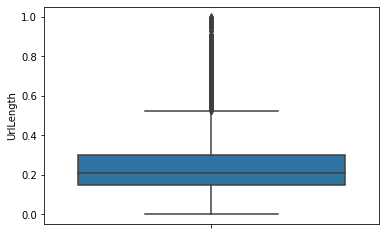

In [ ]:
import seaborn as sns
sns.boxplot(y=df['UrlLength'])

In [ ]:
df = pd.concat([df, y], axis = 1)
df.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,0.1,0.071429,0.277778,0.248963,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.127820,0.273292,0.000000,0.0,0.000000,0.0,0.000,0.250000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.5,1.0,1.0,0.0,1.0,1
1,0.1,0.071429,0.166667,0.547718,0.000000,0.0,0.0,0.0,0.111111,0.0,0.086957,0.045455,0.0,0.369369,1.0,0.0,0.0,0.0,0.0,0.0,0.097744,0.099379,0.547872,0.0,0.333333,0.0,0.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1
2,0.1,0.071429,0.111111,0.190871,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.172932,0.149068,0.000000,0.0,0.000000,0.0,0.375,1.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,1.0,0.0,0.5,1
3,0.1,0.071429,0.333333,0.278008,0.018182,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.135338,0.310559,0.000000,0.0,0.000000,1.0,1.000,0.095238,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1
4,0.1,0.000000,0.222222,0.141079,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.018018,1.0,1.0,0.0,0.0,1.0,0.0,0.045113,0.180124,0.000000,0.0,0.000000,0.0,1.000,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.5,0.0,0.0,1


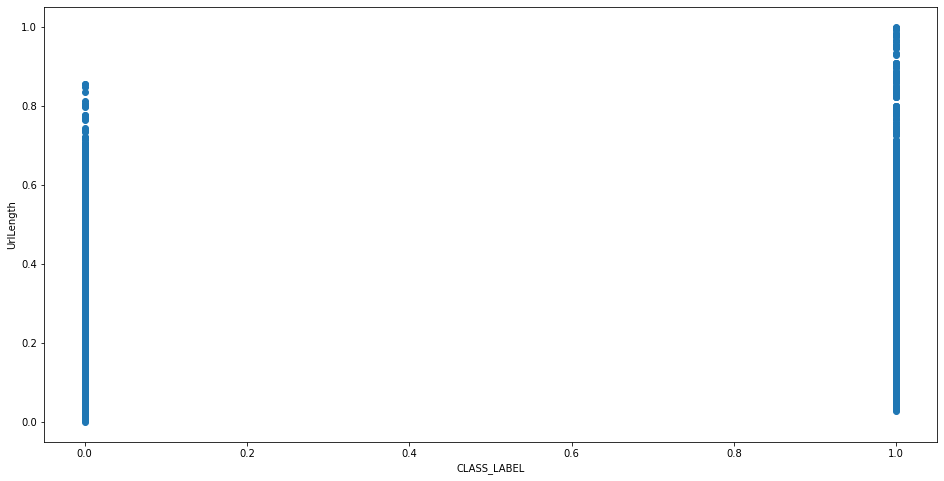

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['CLASS_LABEL'], df['UrlLength'])
ax.set_xlabel('CLASS_LABEL')
ax.set_ylabel('UrlLength')
plt.show()

## Membuka Outlier

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

NumDots                               0.050000
SubdomainLevel                        0.071429
PathLevel                             0.111111
UrlLength                             0.149378
NumDash                               0.036364
NumDashInHostname                     0.000000
AtSymbol                              0.000000
TildeSymbol                           0.000000
NumUnderscore                         0.000000
NumPercent                            0.000000
NumQueryComponents                    0.000000
NumAmpersand                          0.000000
NumHash                               0.000000
NumNumericChars                       0.072072
NoHttps                               0.000000
RandomString                          1.000000
IpAddress                             0.000000
DomainInSubdomains                    0.000000
DomainInPaths                         1.000000
HttpsInHostname                       0.000000
HostnameLength                        0.060150
PathLength   

In [ ]:
print(df.shape)

(10000, 49)


In [ ]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.reset_index(drop=True, inplace=True)
print(df_out.shape)

(1103, 49)


In [ ]:
df_out.isnull().sum()

NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0
NumSensitiveWords                     0


## Dimension Reduction

Dalam membuat model kita perul attribut sebuah data namun beberapa kondisi semakin banyak atribut menyebabkan meningkatnya error karena terlalu banyak dimensi nah untuk mengurangi dimensi dilakukan dimension reduction

## Feature Importance

1. Univariate Selection

Univariate selection adalah seleksi fitur yang bekerja dengan cara menganalisa masing-masing atribut dengan melihat hubungannya dengan atribut response. Metode Univariate Selection merupakan metode yang sederhana untuk melakukan seleksi fitur. Salah satu metode yang digunakan dalam Univariate Selection adalah dengan menggunakan chi-square.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df_out.drop("CLASS_LABEL",1)   #Feature Matrix
y = df_out["CLASS_LABEL"]    #target column i.e price range#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=10)

fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
p_values = pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores, p_values],axis=1)
featureScores.columns = ['Label Image','chi-square Score', 'p-values']  #naming the dataframe columns
print(featureScores.nlargest(77,'chi-square Score'))  #print 10 best features

                           Label Image  chi-square Score      p-values
39                       IframeOrFrame        240.183122  3.587375e-54
27                  PctExtResourceUrls        136.325031  1.694020e-31
26                    PctExtHyperlinks         53.199701  3.013047e-13
46                 ExtMetaScriptLinkRT         41.978898  9.226374e-11
44                PctExtResourceUrlsRT         21.765269  3.081278e-06
33       PctNullSelfRedirectHyperlinks         15.661940  7.573292e-05
18                       DomainInPaths         13.971980  1.855555e-04
15                        RandomString         12.809211  3.449170e-04
4                              NumDash         10.081079  1.497996e-03
13                     NumNumericChars          3.447727  6.333883e-02
2                            PathLevel          2.290238  1.301900e-01
0                              NumDots          1.829735  1.761588e-01
43                         UrlLengthRT          0.507561  4.761967e-01
47  Pc

2. SVM-RFE

SVM-RFE adalah metode feature selection dengan menggunakan SVM. RFE(Recursive Feature Elimination) adalah teknik yang digunakan untuk melakukan konstruksi model berulang kali untuk memperoleh fitur terbaik setelah itu fitur tersebut akan dikeluarkan. 

In [ ]:
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import fbeta_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
from operator import itemgetter

X = df_out.drop("CLASS_LABEL",1)   #Feature Matrix
y = df_out["CLASS_LABEL"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

colnames = X.columns
n_features_to_select = 1
svclassifier = SVC(kernel='linear')
rfe = RFE(svclassifier, n_features_to_select, verbose = 1)
rfe.fit(X, y)

y_pred = rfe.predict(X)

ranks[f"RFE score"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 fe

In [ ]:
# Put the mean scores into a Pandas dataframe
df_rank = pd.DataFrame(list(ranks[f"RFE score"].items()), columns= ['Feature','Scores'])

# Sort the dataframe
df_rank = df_rank.sort_values('Scores', ascending=False)

In [ ]:
df_rank

,Feature,Scores
46,ExtMetaScriptLinkRT,1.00
33,PctNullSelfRedirectHyperlinks,0.98
26,PctExtHyperlinks,0.96
47,PctExtNullSelfRedirectHyperlinksRT,0.94
44,PctExtResourceUrlsRT,0.91
4,NumDash,0.89
0,NumDots,0.87
2,PathLevel,0.85
1,SubdomainLevel,0.83
20,HostnameLength,0.81


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


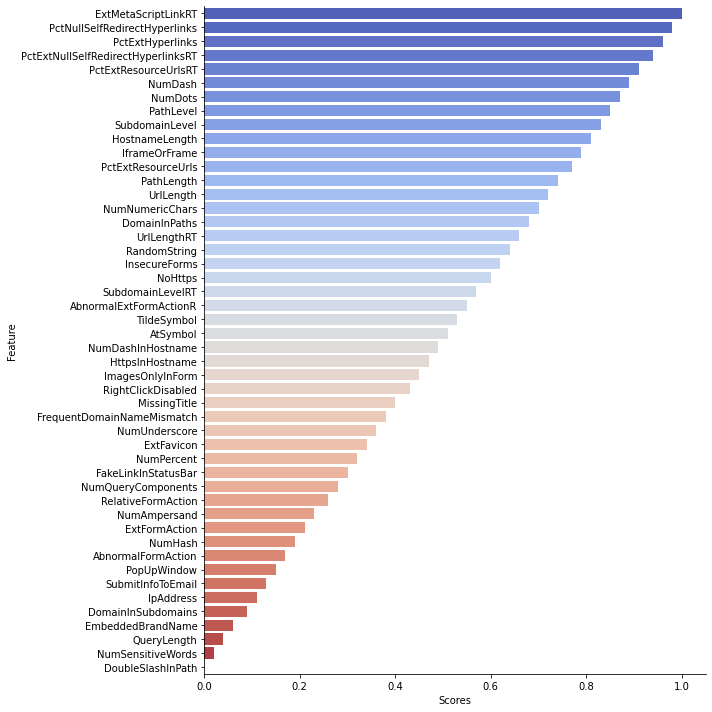

In [ ]:
import seaborn as sns
# Let's plot the ranking of the features
sns.factorplot(x="Scores", y="Feature", data = df_rank, kind="bar", 
               size=10, aspect=1, palette='coolwarm')

3. Extratrees

Feture Importance, Seperti pada proses algoritma classifier pada umumnya, kita akan melakukan fitting pada atribut prediktor dan atribut response. Setelah itu, kita menggunakan atribut feature_importances dari model yang telah siap. Kemudian kita lakukan plot terhadap 20 atribut yang memiliki feature_importances tertinggi 

[0.02443498 0.01430275 0.03543048 0.01689468 0.07027854 0.
 0.         0.         0.         0.         0.         0.
 0.         0.03886123 0.         0.00939863 0.         0.
 0.01098091 0.         0.017233   0.02106513 0.         0.
 0.         0.         0.1251879  0.14060754 0.         0.
 0.         0.         0.         0.13204256 0.         0.
 0.         0.         0.         0.09536439 0.         0.
 0.         0.00945386 0.05693097 0.         0.17371138 0.00782107]


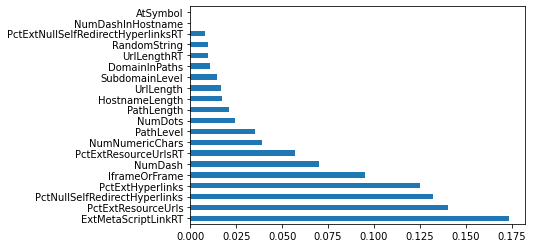

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

4. Correlation Matrix with 
Heatmap

Metode dengan menggunakan correlation matrix, Matrix yang dihasilkan menunjukkan seberapa tingkat korelasi antar atribut.Pada contoh berikut, kita menggunakan basis warna hijau, kuning dan merah. atribut yang memiliki korelasi yang tinggi ditandai dengan warna hijau, kemudian kuning dan yang paling lemah adalah merah.

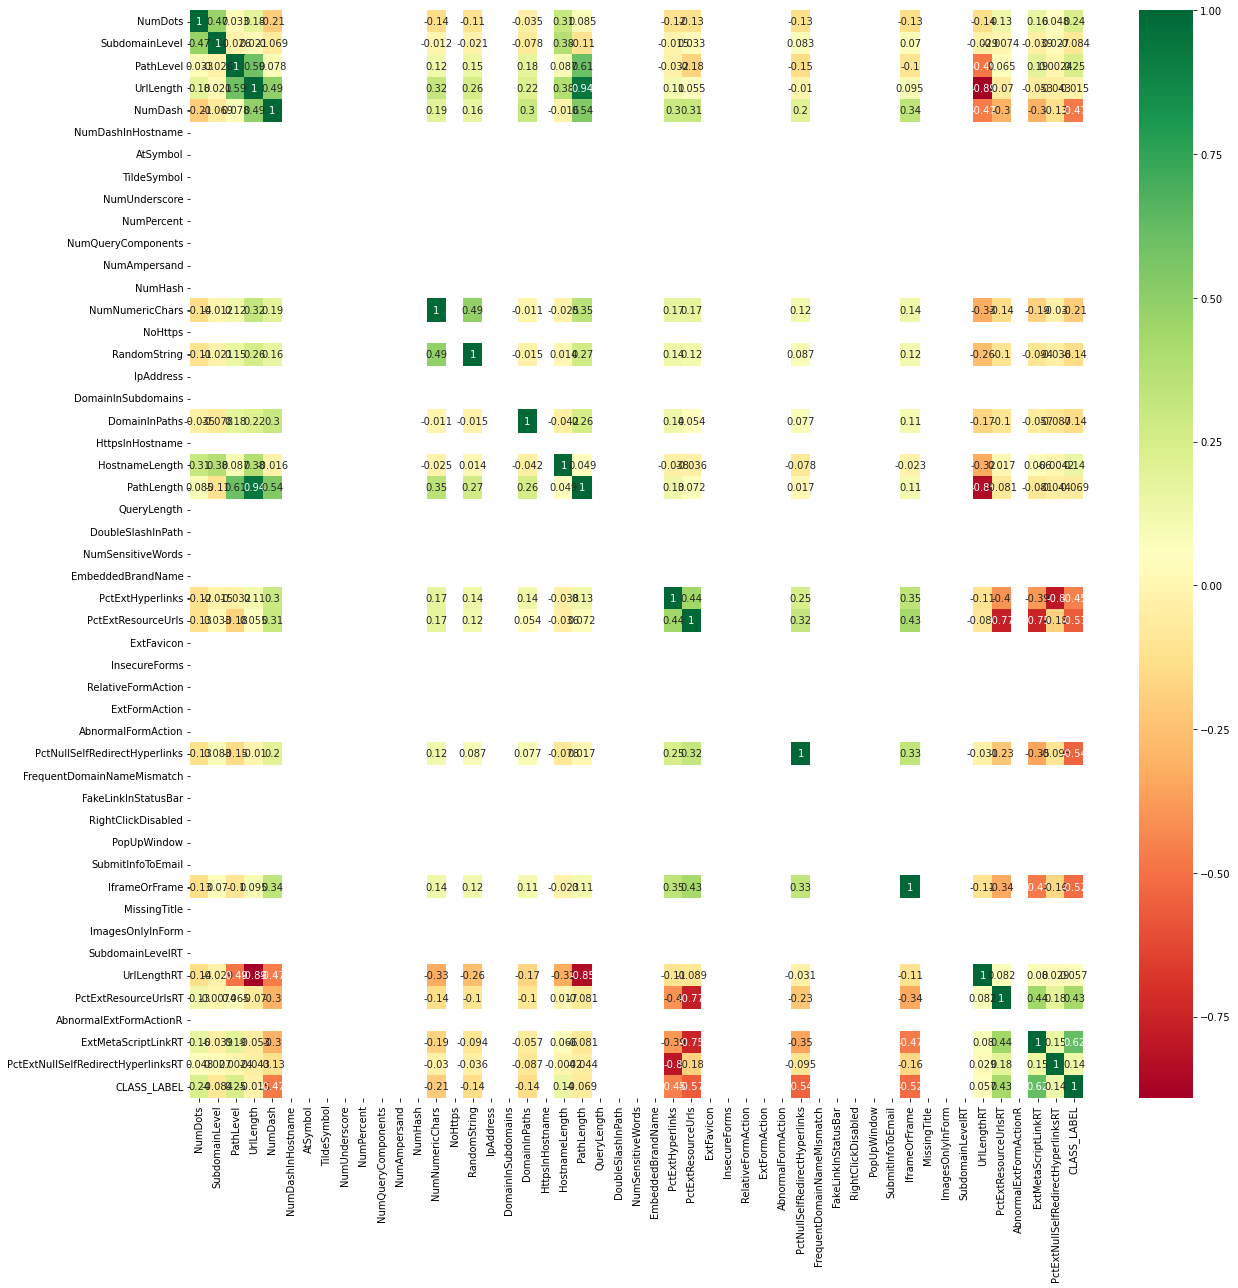

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

X = df_out.drop("CLASS_LABEL",1)   #Feature Matrix
y = df_out["CLASS_LABEL"]   #target column i.e price range
#get correlations of each features in dataset

corrmat = df_out.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_out[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Feature Extraction

Feature Extraction adalah salah satu metode yang digunakan untuk reduksi dimensi. Feature extraction berguna untuk menghasilkan dimensi dari dataset yang lebih kecil dari dimensi aslinya.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
X = pd.get_dummies(X, prefix_sep='_')
y = LabelEncoder().fit_transform(y)
X = StandardScaler().fit_transform(X)

1. LDA

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


lda = LinearDiscriminantAnalysis(n_components = 2).fit_transform(X,y)
ldaDf = pd.DataFrame(data = lda, columns=['component 1'])
ldaDf["component2"] = 0
finalDf = pd.concat([ldaDf, df_out["CLASS_LABEL"]], axis = 1)
finalDf.head()

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(48, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


,component 1,component2,CLASS_LABEL
0,0.832979,0,1
1,1.072951,0,1
2,1.745719,0,1
3,0.585406,0,1
4,-1.195897,0,1


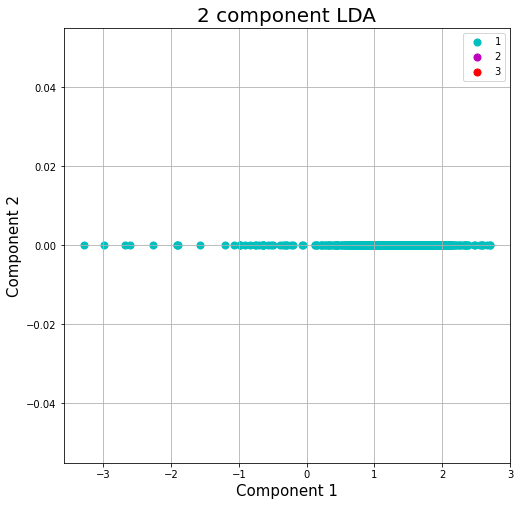

In [53]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 component LDA', fontsize = 20)
targets = [1,2,3,4,5]
colors = ['c', 'm','r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['CLASS_LABEL'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'component 1']
               , finalDf.loc[indicesToKeep, 'component2']
               , c = color
               , s = 50)
ax.legend(["1", "2",'3','4','5'])
ax.grid()

2. PCA

PCA merupakan metode feature extraction dengan menggunakan bidang/garis yang disebut sebagai principal component. PCA ini dapat digunakan dalam melakukan reduksi dimensi pada data yang tidak memiliki label atau secara umum disebut unsupervised learning

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3) 
principalComponents = pca.fit_transform(X) 
principalDf = pd.DataFrame(data = principalComponents, columns=['pc1', 'pc2', 'pc3'])
pcDf = pd.concat([principalDf, df_out["CLASS_LABEL"]], axis = 1)
pcDf

,pc1,pc2,pc3,CLASS_LABEL
0,0.229668,0.016309,-0.762903,1
1,-0.377750,0.668078,-0.404161,1
2,0.066439,-0.703922,-0.308404,1
3,-0.083618,-0.692502,-0.166241,1
4,0.632883,1.063313,0.568576,1
...,...,...,...,...
1098,-0.448523,0.050931,0.430593,0
1099,-0.270224,0.113836,0.614724,0
1100,0.254359,0.916789,0.208276,0
1101,0.354793,-0.600234,0.024285,0


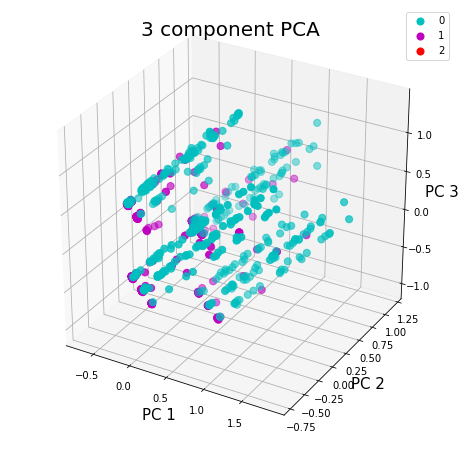

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1, projection='3d') 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_zlabel('PC 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = [0,1,2]
colors = ['c', 'm','r']
for target, color in zip(targets,colors):
    indicesToKeep = pcDf['CLASS_LABEL'] == target
    ax.scatter(pcDf.loc[indicesToKeep, 'pc1']
               , pcDf.loc[indicesToKeep, 'pc2'],
               pcDf.loc[indicesToKeep, 'pc3']
               , c = color
               , s = 50)
ax.legend(["0", "1","2"])
ax.grid()

3. t-SNE

t-SNE adalah metode statistik yang digunakan untuk memvisualisasikan data berdimensi tinggi dengan cara memetakan setiap data point ke sebuah lokasi pada diagram 2 atau 3 dimensi.

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=0)

In [ ]:
X_3d = tsne.fit_transform(X)

In [ ]:
print(X_3d)


[[-13.675072    -0.08819134  -7.601274  ]
 [  3.4267013    0.91080153  13.938248  ]
 [ 10.102796     4.953852   -10.107846  ]
 ...
 [ -5.4840126    5.2408314    7.96655   ]
 [  2.6258802    5.390456    -6.0611286 ]
 [  0.80625546   3.588417    12.626282  ]]


In [ ]:
new_df = pd.DataFrame(data=X_3d, columns = ['feature 1', 'feature 2', 'feature 3'])
tsne_df = pd.concat([new_df, df_out["CLASS_LABEL"]], axis=1)
tsne_df.head()

,feature 1,feature 2,feature 3,CLASS_LABEL
0,-13.675072,-0.088191,-7.601274,1
1,3.426701,0.910802,13.938248,1
2,10.102796,4.953852,-10.107846,1
3,-4.910431,11.983476,-10.398132,1
4,-3.628549,4.078367,6.437911,1


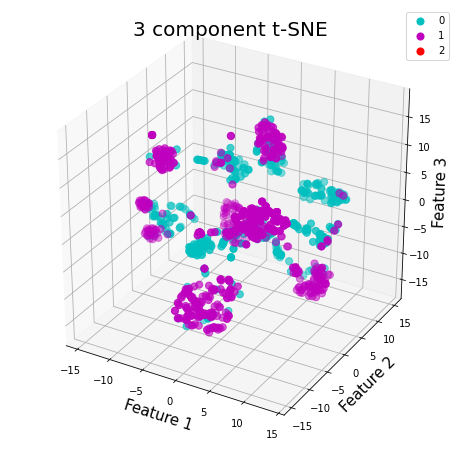

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1, projection='3d') 
ax.set_xlabel('Feature 1', fontsize = 15)
ax.set_ylabel('Feature 2', fontsize = 15)
ax.set_zlabel('Feature 3', fontsize = 15)
ax.set_title('3 component t-SNE', fontsize = 20)
targets = [0,1,2]
colors = ['c', 'm','r']
for target, color in zip(targets,colors):
    indicesToKeep = tsne_df['CLASS_LABEL'] == target
    ax.scatter(tsne_df.loc[indicesToKeep, 'feature 1']
               , tsne_df.loc[indicesToKeep, 'feature 2'],
               tsne_df.loc[indicesToKeep, 'feature 3']
               , c = color
               , s = 50)
ax.legend(["0", "1","2"])
ax.grid()